# Author : Venkadasubramanian Jayakumar

## Task 1: Prediction using Supervised Machine Learning

## GRIP @ The Sparks Foundation
> - Create a model to predict the percentage of an student based on the no. of study hours using simple **Linear Regression** with just 2 variables.

> - What will be the predicted score if a student studies for 9.25 hrs/day?

## Necessary Libraries

In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Import the data and preview

In [2]:
# Read the data from the source and preview
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's visualize the data to see the relationship between the two variables **"Hours"** and **"Scores"**

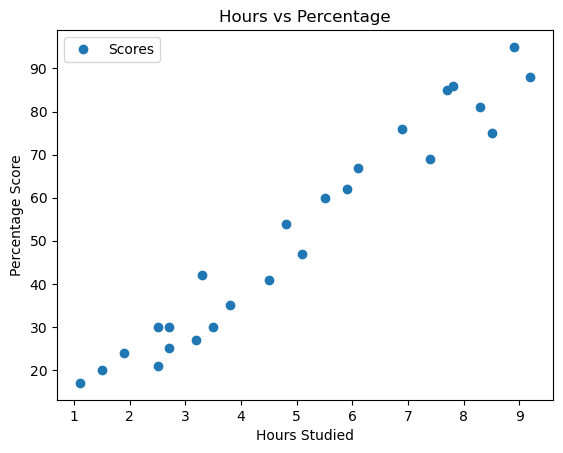

In [3]:
#Plotting the distribution of scores againts Hours using scatterplot
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### **From the plot we can see that there is a positive linear relationship between the two variables, as the number of study hours increase the percentage of score also increase**

## Data Preparation

Dividing the data into features (inputs) and labels (outputs) as X and y respectively

In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print(f'Size of feature data: {X.shape}')
print(f'Size of label data: {y.shape}')

Size of feature data: (25, 1)
Size of label data: (25,)


After splitting the data in features and labels, lets divide the data as train set and test set to evaluate the performance of the model created using the train set

In [5]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

print(f'Size of X_train: {X_train.shape}')
print(f'Size of y_train: {y_train.shape}')
print(f'Size of X_test: {X_test.shape}')
print(f'Size of X_test: {y_test.shape}')


Size of X_train: (20, 1)
Size of y_train: (20,)
Size of X_test: (5, 1)
Size of X_test: (5,)


## Model Training

In [6]:
LinearModel = LinearRegression()
LinearModel.fit(X_train,y_train)

LinearRegression()

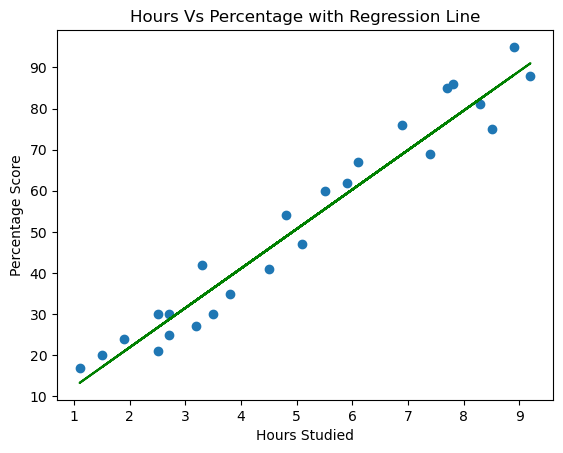

In [14]:
# Plotting the regression line across the whole data
line = LinearModel.coef_*X+LinearModel.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='green')
plt.title("Hours Vs Percentage with Regression Line")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We can see that our linear model fit very well with out orignial data

## Making Prediction

In [8]:
#Predict the y - label using the X test data
y_pred = LinearModel.predict(X_test)

#Actual vs predicted
df = pd.DataFrame({'X_test':X_test.reshape(y_test.shape[0],),'Actual_score':y_test,'Predicted_score':y_pred})
df

,X_test,Actual_score,Predicted_score
0,1.5,20,17.097967
1,4.8,54,48.783639
2,3.8,35,39.181920
3,6.1,67,61.265873
4,8.9,95,88.150686


In [9]:
# Testing the model with our own data
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = LinearModel.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]:.2f}")
print()
print(f"What will be the predicted score if a student studies for 9.25 hrs/day? \nThe predicted score is {own_pred[0]:.2f} if a student studies for 9.25 hrs/day")

No of Hours = [[9.25]]
Predicted Score = 91.51

What will be the predicted score if a student studies for 9.25 hrs/day? 
The predicted score is 91.51 if a student studies for 9.25 hrs/day


## Model Evaluation

It's important to evalute the performance of the model using various metrics to understand the different in predict to the actual value on this particular dataset.

In [10]:
print(f'Model Score on training data {LinearModel.score(X_train,y_train)}')
print(f'Model Score on Test data: {LinearModel.score(X_test,y_test)}')

Model Score on training data 0.9493255692526655
Model Score on Test data: 0.9605221627526419


In [11]:
from sklearn import metrics
model_metrics = pd.DataFrame({'R-squared':[metrics.r2_score(y_test,y_pred)],
                            'Mean Absolute Error':[metrics.mean_absolute_error(y_test,y_pred)],
                            'Root Mean Squared Error':[np.sqrt(metrics.mean_squared_error(y_test,y_pred))]})
model_metrics.T

,0
R-squared,0.960522
Mean Absolute Error,4.976751
Root Mean Squared Error,5.155851


Text(0, 0.5, 'Percentage Score')

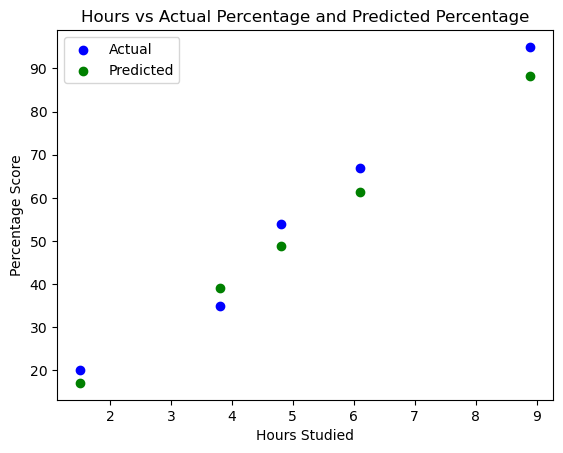

In [15]:
plt.scatter(df.X_test,df.Actual_score,color='blue')
plt.scatter(df.X_test,df.Predicted_score,color='green')
plt.legend(['Actual','Predicted'])
plt.title("Hours vs Actual Percentage and Predicted Percentage")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

## Conclusion

- We can see that the predicted scores are much closed to the actual score in the test data thus our model performs well on the unknown test data as well
-  R-squared scored give the model's capability to expalin the variance present in the data as our model scores 0.96 which is a great score for the given data.

## END